### BBI Kenya Report 2019

In [180]:

#Import Libaries
import json
import csv
import tweepy as tw
import re
import pandas as pd

In [181]:
from nltk.corpus import stopwords
from textblob import TextBlob
import numpy as np

In [182]:
access_token = "1033758126699364353-x3BuGV7xyqRDzFGavUH6OeCj0WpsUS"
access_secret = "sZWdviYTFuVENnNvcWEyk2G34pEcMt8zdkvGhblQcLSl4"
consumer_key = "NJjaAZwo1ebDZWHTuYFv7PobW"
consumer_secret = "QHQUEYmDoiBMqk0PitkUl2BxbAKp2XEsrVpvKtmgEYr4ZlXkph"
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [27]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')


In [ ]:
#Extract tweets with the hashtag #Sex4Grades
msgs = []
msg =[]

for tweet in tweepy.Cursor(api.search, q='#BBIKenya', rpp=100).items(4000):
    msg = [tweet.created_at, tweet.text, tweet.lang, tweet.user.location, tweet.user.verified, tweet.source, tweet.retweet_count, tweet.favorite_count] 
    msg = tuple(msg)                    
    msgs.append(msg)

df = pd.DataFrame(msgs)

In [22]:
df.head(4)

,0,1,2,3,4,5,6,7
0,2019-10-25 14:53:25,"RT @JerotichSeii: Thank you, @Hakeenah. This i...",en,"Nairobi, Kenya",False,Twitter for Android,108,0
1,2019-10-25 14:51:40,RT @rariedabull: The magnificent building unde...,en,Ciudad de Mexico,False,Twitter for Android,64,0
2,2019-10-25 14:49:18,"RT @JerotichSeii: Thank you, @Hakeenah. This i...",en,127.0.0.1,False,Twitter for Android,108,0
3,2019-10-25 14:40:13,RT @harun_johnson: Seen this? @hotshotcreative...,en,A Place Near You.,False,Twitter for Android,4,0


In [25]:
df.shape

(1775, 8)

In [28]:

#export data to csv
df.to_csv("#BBIKenya.csv", index=False)

In [ ]:
df.shape

## The Building Bridges Initiative Report 2019 Sentiment Analysis

In [351]:
#Import Packages

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import warnings
import nltk
from nltk.tokenize import word_tokenize
import string
import seaborn as sns
from nltk.stem.porter import * 
from wordcloud import WordCloud

warnings.filterwarnings('ignore')
%matplotlib inline

In [352]:
from nltk.corpus import stopwords
from textblob import TextBlob
import numpy as np

In [353]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize # import word_tokenize

from nltk.corpus import stopwords #import stop words
import re # import regular expression
from nltk.tokenize import word_tokenize # import word_tokenize
from sklearn.utils import shuffle # to shuffle the data
import random # import random
import sklearn # import sklearn
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer

from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS

In [354]:
# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [355]:
# Loading the Dataset

dataset = pd.read_csv('#BBIKenya.csv')
dataset.head(3)

,0,1,2,3,4,5,6,7
0,2019-10-25 14:53:25,"RT @JerotichSeii: Thank you, @Hakeenah. This i...",en,"Nairobi, Kenya",False,Twitter for Android,108,0
1,2019-10-25 14:51:40,RT @rariedabull: The magnificent building unde...,en,Ciudad de Mexico,False,Twitter for Android,64,0
2,2019-10-25 14:49:18,"RT @JerotichSeii: Thank you, @Hakeenah. This i...",en,127.0.0.1,False,Twitter for Android,108,0


In [356]:
dataset.shape

(1775, 8)

#### Description of the Numerical Columns

In [101]:
dataset.describe()

,Retweet_count,Favourite_count,Sentiment,Year,Week of the Year,Day of the Year,Day of the Week,Hour,Minute
count,1775.000000,1775.000000,1775.000000,1775.0,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000
mean,55.437746,1.400000,0.102351,2019.0,42.772958,295.451831,3.041127,11.459155,28.931268
std,70.902456,12.774649,0.261587,0.0,0.419038,2.337339,1.333803,5.173364,17.178642
min,0.000000,0.000000,-0.700000,2019.0,42.000000,289.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,0.000000,2019.0,43.000000,295.000000,2.000000,7.000000,14.000000
50%,36.000000,0.000000,0.000000,2019.0,43.000000,296.000000,3.000000,12.000000,29.000000
75%,83.000000,0.000000,0.100000,2019.0,43.000000,297.000000,4.000000,15.000000,45.000000
max,1909.000000,415.000000,1.000000,2019.0,43.000000,298.000000,6.000000,23.000000,59.000000


###  Description of the Non-Numerical Columns

In [189]:
dataset.describe(include = ['O'])

,0,1,2,3,5
count,1775,1775,1775,1140,1775
unique,1764,340,5,214,11
top,2019-10-24 13:26:38,RT @JerotichSeii: Dear @TonyGachoka #KTNPointb...,en,"Nairobi, Kenya",Twitter for Android
freq,2,175,1704,265,1225


In [190]:
print('Dataset size:',dataset.shape)
print('Columns are:',dataset.columns)

### Renaming the Columns

In [358]:
dataset = dataset.rename(columns={'0': 'Datetime Created', '1': 'Tweet','2':'Language','3':'Location','4':'UserAccount Verified','5':'Tweet Source','6':'Retweet_count','7':'Favourite_count'})

### Polarit of the Sentiment

In [359]:
dataset['Sentiment'] = dataset['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

In [360]:
print("Dataset size:", len(dataset))

In [361]:
dataset['UserAccount Verified'].value_counts()

False    1770
True        5
Name: UserAccount Verified, dtype: int64

### Decoding the Date Time Column

In [362]:
from datetime import date

In [363]:
dataset['Datetime Created'] = pd.to_datetime(dataset['Datetime Created'])

In [364]:
dataset['Year'] = dataset['Datetime Created'].dt.year
dataset['Week of the Year'] = dataset['Datetime Created'].dt.weekofyear
dataset['Day of the Year'] = dataset['Datetime Created'].dt.dayofyear
dataset['Month_name'] = dataset['Datetime Created'].dt.month_name()
dataset['Day of the Week'] = dataset['Datetime Created'].dt.weekday
dataset['Name of the Day'] = dataset['Datetime Created'].dt.day_name()
dataset['Hour'] = dataset['Datetime Created'].dt.hour
dataset['Minute'] = dataset['Datetime Created'].dt.minute

In [365]:
dataset.head(3)

,Datetime Created,Tweet,Language,Location,UserAccount Verified,Tweet Source,Retweet_count,Favourite_count,Sentiment,Year,Week of the Year,Day of the Year,Month_name,Day of the Week,Name of the Day,Hour,Minute
0,2019-10-25 14:53:25,"RT @JerotichSeii: Thank you, @Hakeenah. This i...",en,"Nairobi, Kenya",False,Twitter for Android,108,0,0.0,2019,43,298,October,4,Friday,14,53
1,2019-10-25 14:51:40,RT @rariedabull: The magnificent building unde...,en,Ciudad de Mexico,False,Twitter for Android,64,0,0.6,2019,43,298,October,4,Friday,14,51
2,2019-10-25 14:49:18,"RT @JerotichSeii: Thank you, @Hakeenah. This i...",en,127.0.0.1,False,Twitter for Android,108,0,0.0,2019,43,298,October,4,Friday,14,49


### Categorizing the Sentiments of the Tweets

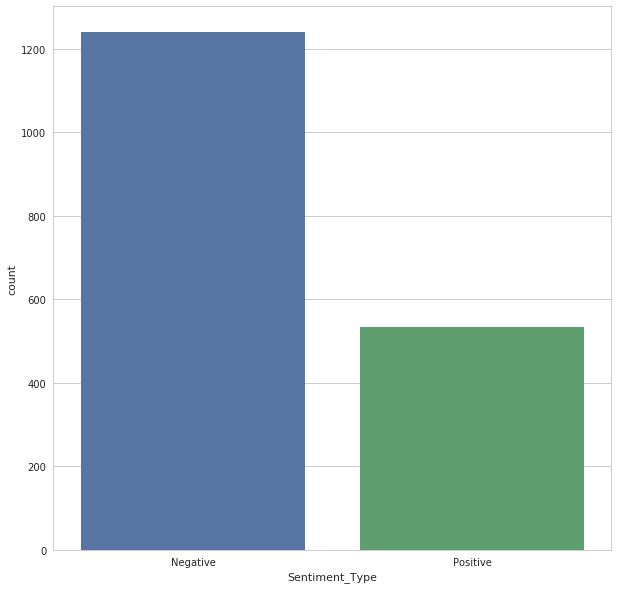

In [366]:
from textblob import TextBlob

bloblist_title = list()

df_usa_title_str=dataset['Tweet']
for row in df_usa_title_str:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_title = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(df_usa_polarity_title):
    if df_usa_polarity_title['sentiment'] > 0:
        val = "Positive"
    else:
        val = "Negative"
    return val

df_usa_polarity_title['Sentiment_Type'] = df_usa_polarity_title.apply(f_title, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_title)

## Detecting and Treating Missing Values 

,Total,Percent
Location,635,0.357746
Minute,0,0.000000
Favourite_count,0,0.000000
Tweet,0,0.000000
Language,0,0.000000


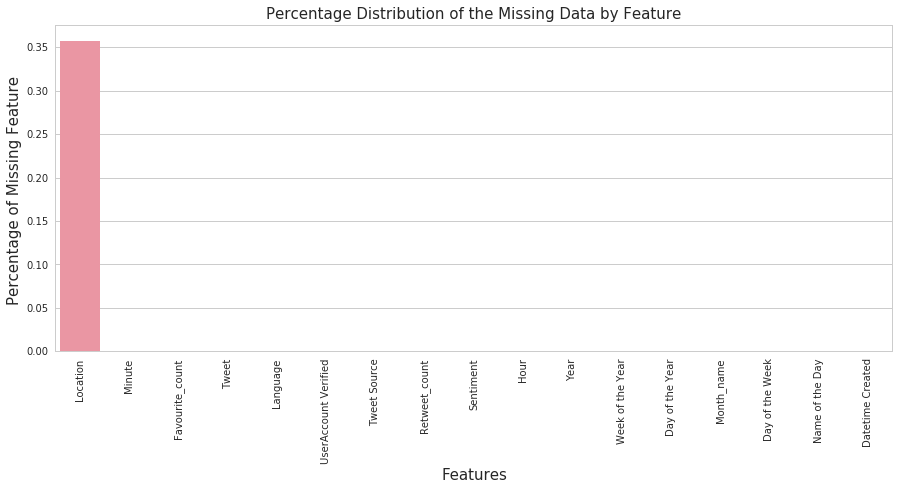

In [367]:
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of Missing Feature ', fontsize=15)
plt.title('Percentage Distribution of the Missing Data by Feature', fontsize=15)
missing_data.head()

In [368]:
dataset['Location'].value_counts()

Nairobi, Kenya                    265
Kenya                             145
Nairobi                           117
#AmKenyan                          37
Mombasa, Kenya                     32
nairobi                            23
Nairobi Kenya                      20
Mombasa                            18
Democratic Republic of Congo       13
Global                             12
Earth.MilkyWayGalaxy.Universe      12
kenya                              10
@Nairobi kenya                     10
A Place Near You.                  10
TinkerBellLand                      9
Jiji Kuu 🇰🇪🇰🇪🇰🇪🇰🇪..                 9
+254                                9
NBO                                 9
Nairobi                             9
Africa                              8
Mombasa, Kenya.                     7
Arlington, TX / Nairobi - West      7
nairobi kenya                       6
Kenya🇰🇰🇪🇪                           6
East Africa                         6
Kenya.                              5
Kakamega, Ke

In [369]:
data_cat=dataset
data_cat['Location'].fillna(data_cat['Location'].mode()[0], inplace=True)
data_cat.head(2)

,Datetime Created,Tweet,Language,Location,UserAccount Verified,Tweet Source,Retweet_count,Favourite_count,Sentiment,Year,Week of the Year,Day of the Year,Month_name,Day of the Week,Name of the Day,Hour,Minute
0,2019-10-25 14:53:25,"RT @JerotichSeii: Thank you, @Hakeenah. This i...",en,"Nairobi, Kenya",False,Twitter for Android,108,0,0.0,2019,43,298,October,4,Friday,14,53
1,2019-10-25 14:51:40,RT @rariedabull: The magnificent building unde...,en,Ciudad de Mexico,False,Twitter for Android,64,0,0.6,2019,43,298,October,4,Friday,14,51


### Checking for any Missing Values after Imputation


In [370]:
# Checking for any Missing Values after Imputation

missing_df =data_cat.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name', 'Missing Values Count']
missing_df['Filling Factor (%)']=(data_cat.shape[0]-missing_df['Missing Values Count'])/data_cat.shape[0]*100
missing_df.sort_values('Filling Factor (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filling Factor (%)
0,Datetime Created,0,100.0
1,Name of the Day,0,100.0
2,Day of the Week,0,100.0
3,Month_name,0,100.0
4,Day of the Year,0,100.0
5,Week of the Year,0,100.0
6,Year,0,100.0
7,Hour,0,100.0
8,Sentiment,0,100.0
9,Retweet_count,0,100.0


### Top 5 Locations of the Tweeeps

Text(0.5,1,'Top 5 Locations of the Most Tweets')

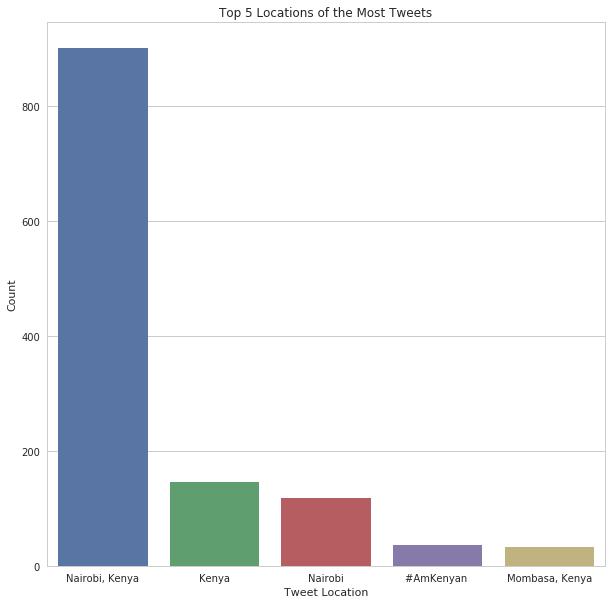

In [371]:
trending_location=dataset.groupby(by=['Location'],as_index=False).count().sort_values(by='Tweet',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=trending_location['Location'],y=trending_location['Tweet'], data=trending_location)
plt.xlabel("Tweet Location")
plt.ylabel("Count")
plt.title("Top 5 Locations of the Most Tweets")

### Days of the Week Vs the Tweets Per Day

Text(0.5,1,'Days of the Week Vs the Tweets tweeted per Day')

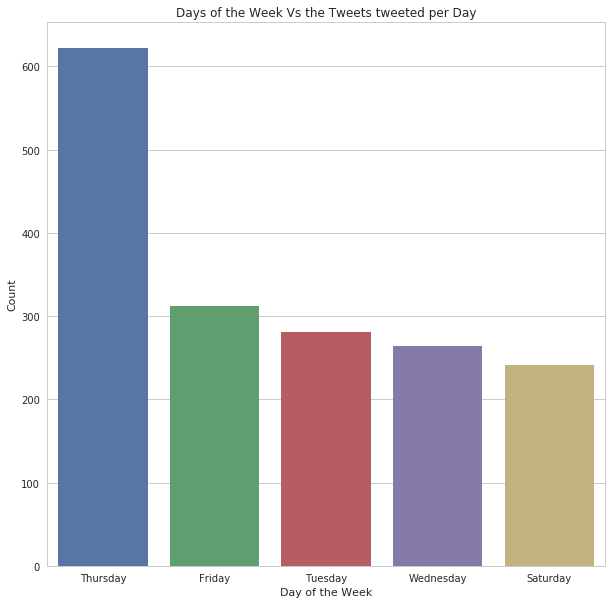

In [372]:
day_of_the_week=dataset.groupby(by=['Name of the Day'],as_index=False).count().sort_values(by='Tweet',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=day_of_the_week['Name of the Day'],y=day_of_the_week['Tweet'], data=day_of_the_week)
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.title("Days of the Week Vs the Tweets tweeted per Day")

### Language Used in the Tweets by the Tweeps

Text(0.5,1,'Language of the Tweets')

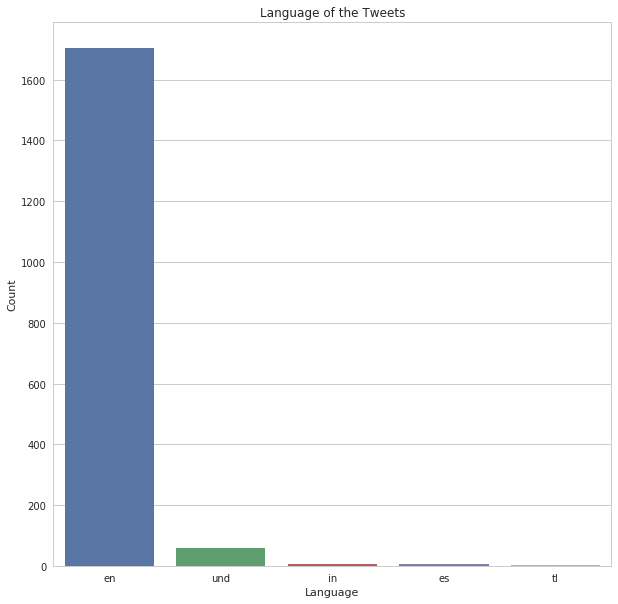

In [373]:
day_of_the_week=dataset.groupby(by=['Language'],as_index=False).count().sort_values(by='Tweet',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=day_of_the_week['Language'],y=day_of_the_week['Tweet'], data=day_of_the_week)
plt.xlabel("Language")
plt.ylabel("Count")
plt.title("Language of the Tweets")

### Device Type Used to Tweet by the Tweeps

Text(0.5,1,'Device Type used to Tweet')

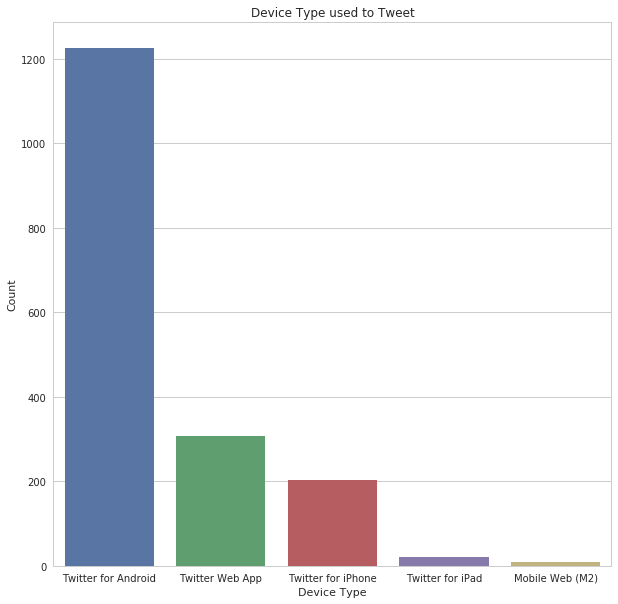

In [374]:
day_of_the_week=dataset.groupby(by=['Tweet Source'],as_index=False).count().sort_values(by='Tweet',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=day_of_the_week['Tweet Source'],y=day_of_the_week['Tweet'], data=day_of_the_week)
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.title("Device Type used to Tweet")

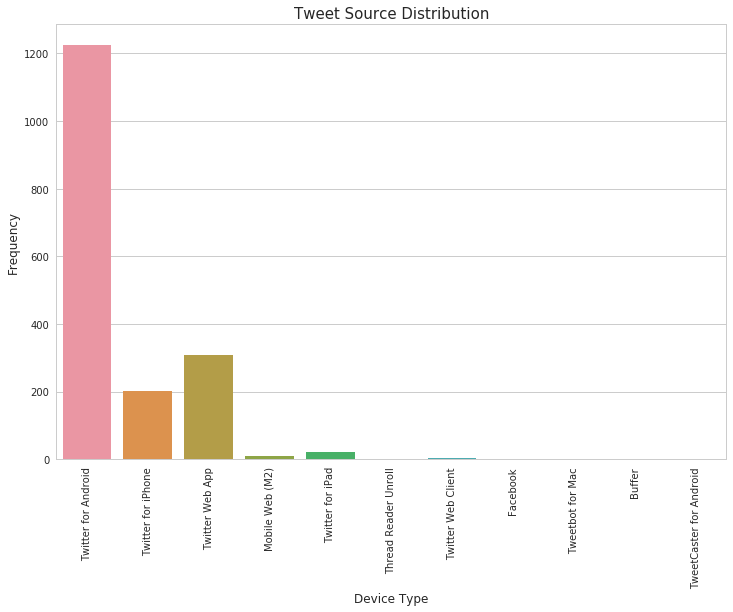

In [424]:
plt.figure(figsize=(12,8))
sns.countplot(x="Tweet Source", data=dataset)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Device Type', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Tweet Source Distribution", fontsize=15)
plt.show()

###  Top 5 Days of the Year Tweeps Tweeted on the top

Text(0.5,1,'Top 5 Days of the Year Tweets were made')

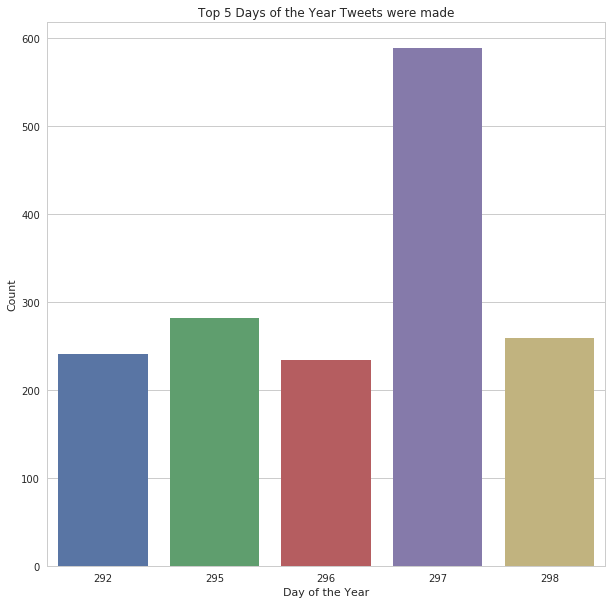

In [375]:
day_of_the_week=dataset.groupby(by=['Day of the Year'],as_index=False).count().sort_values(by='Hour',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=day_of_the_week['Day of the Year'],y=day_of_the_week['Hour'], data=day_of_the_week)
plt.xlabel("Day of the Year")
plt.ylabel("Count")
plt.title("Top 5 Days of the Year Tweets were made")

Text(0.5,1,'Top 5 Days of the Year Tweeps Tweeted')

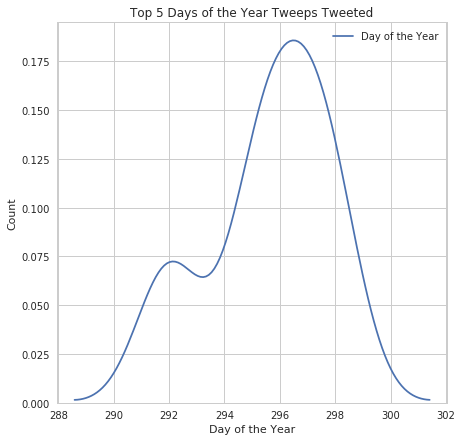

In [376]:
Day_of_the_year=dataset.groupby(by=['Day of the Year'],as_index=False).count().sort_values(by='Hour',ascending=False).head(5)


plt.figure(figsize=(7,7))
sns.kdeplot(Day_of_the_year['Day of the Year']);
plt.xlabel("Day of the Year")
plt.ylabel("Count")
plt.title("Top 5 Days of the Year Tweeps Tweeted")

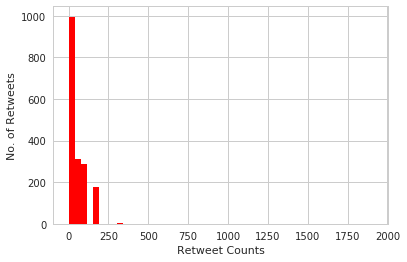

In [377]:
fig, ax = plt.subplots()
_ = sns.distplot(dataset["Retweet_count"], kde=False, rug=False, 
                 color='red', hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Retweet Counts", ylabel="No. of Retweets")

### Plotting of the Hour  Tweeps Tweeted Vs the  Day of the Week

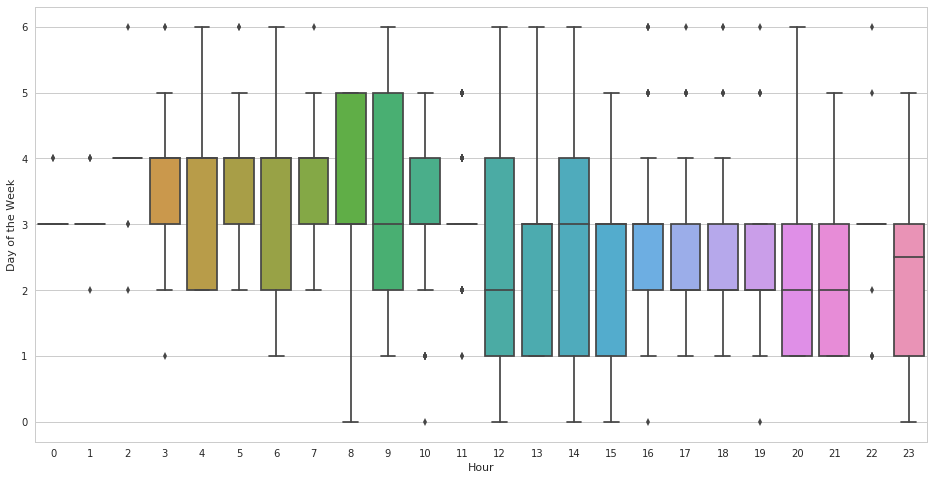

In [378]:
plt.figure(figsize=(16,8))
sns.boxplot(x='Hour',y='Day of the Week', data=dataset)

### Checking if the Tweeps Tweet Contains Capitalized Words

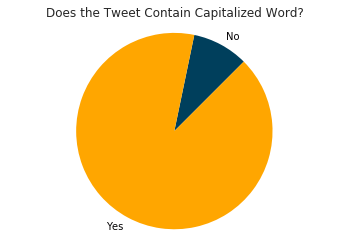

In [130]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


dataset['Contains_capitalized'] = dataset["Tweet"].apply(contains_capitalized_word)

value_counts = dataset["Contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Does the Tweet Contain Capitalized Word?')

In [131]:
dataset["Contains_capitalized"].value_counts(normalize=True)


True     0.907606
False    0.092394
Name: Contains_capitalized, dtype: float64



#### Adding the  Tweets Length Column to the dataset to represent the lenght of each tweet
Plotting the Histogram of the Tweets Length to get an idea about the length of the trending tweets

In [379]:
dataset["Tweet_length"] = dataset["Tweet"].apply(lambda x: len(x))

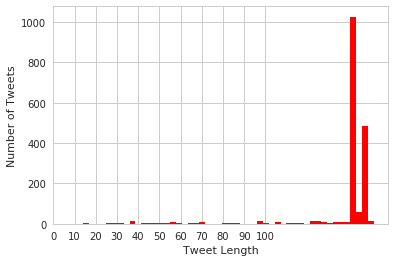

In [380]:
dataset["Tweet_length"] = dataset["Tweet"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(dataset["Tweet_length"], kde=False, rug=False, 
                 color='red', hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Tweet Length", ylabel="Number of Tweets", xticks=range(0, 110, 10))


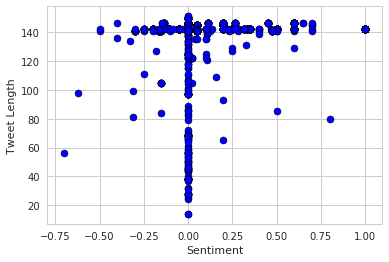

In [381]:
fig, ax = plt.subplots()
_ = ax.scatter(x=dataset['Sentiment'], y=dataset['Tweet_length'], color='blue', edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Sentiment", ylabel="Tweet Length")

## Correlation Between the Tweets  Dataset Variables

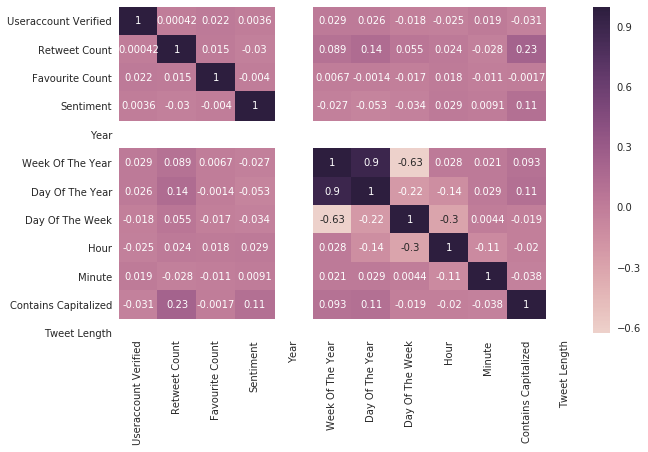

In [382]:
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(dataset.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)


### Displaying the Most Common Words in the Tweets
Words that are used signnificantly in the Trending Tweets. We will dispplay the 25 most common words in all the trending tweets

In [383]:
title_words = list(dataset["Tweet"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('RT', 1558),
 ('@JerotichSeii:', 1355),
 ('the', 1165),
 ('of', 880),
 ('to', 855),
 ('is', 762),
 ('in', 552),
 ('WaKenya:', 545),
 ('&amp;', 523),
 ('you', 490),
 ('that', 436),
 ('his', 351),
 ('I', 341),
 ('has', 325),
 ('for', 310),
 ('as', 293),
 ('a\xe2\x80\xa6', 285),
 ('be', 265),
 ('-', 245),
 ('and', 233),
 ('was', 219),
 ('a', 203),
 ('@TonyGachoka', 194),
 ('your', 193),
 ('@WanjeriNderu', 192)]


### Drawing a Word CLoud Visualization for the Tweets
Visualizing the Most Common Words in the Tweets:  The More Common the word is, the bigger its font size is

In [384]:
from collections import Counter
import datetime
import wordcloud
import json

In [385]:
title_words = list(dataset["Tweet"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('RT', 1558),
 ('@JerotichSeii:', 1355),
 ('the', 1165),
 ('of', 880),
 ('to', 855),
 ('is', 762),
 ('in', 552),
 ('WaKenya:', 545),
 ('&amp;', 523),
 ('you', 490),
 ('that', 436),
 ('his', 351),
 ('I', 341),
 ('has', 325),
 ('for', 310),
 ('as', 293),
 ('a\xe2\x80\xa6', 285),
 ('be', 265),
 ('-', 245),
 ('and', 233),
 ('was', 219),
 ('a', 203),
 ('@TonyGachoka', 194),
 ('your', 193),
 ('@WanjeriNderu', 192)]

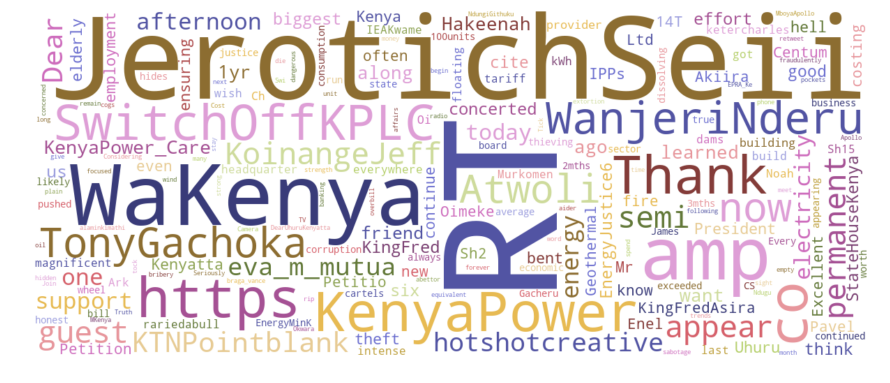

In [386]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

### Distribution of Tweeeps Tweets per Hour

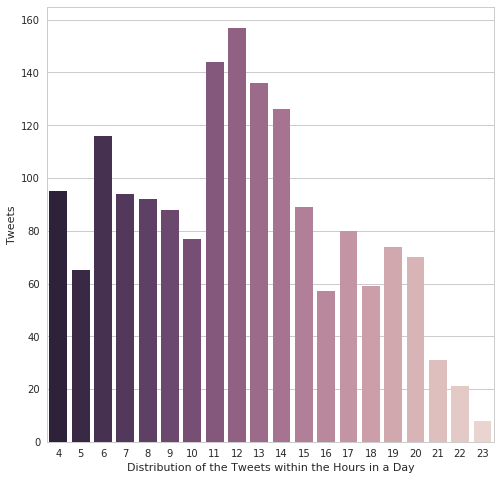

In [388]:
cdf = dataset.groupby("Hour").size().reset_index(name="Tweet") \
    .sort_values("Hour", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="Hour", y="Tweet", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="Distribution of the Tweets within the Hours in a Day", ylabel="Tweets")

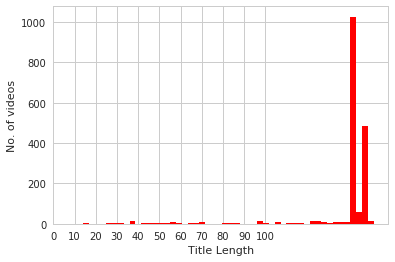

In [389]:
dataset['Tweet_length'] = dataset["Tweet"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(dataset["Tweet_length"], kde=False, rug=False, 
                 color='red', hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

### Distribution of the Tweets Lengths over the Hours of Tweeting in a Day

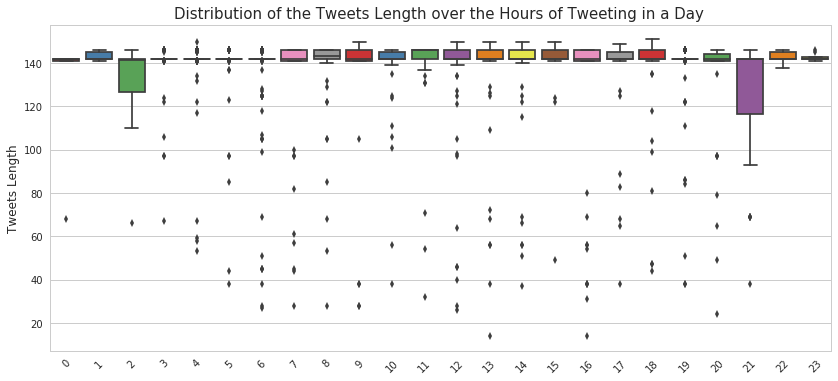

In [392]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='Hour', y='Tweet_length', data=dataset, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Distribution of the Tweets Length over the Hours of Tweeting in a Day ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Tweets Length", fontsize=12)
plt.show()

### Hours Tweeps Tweeeted Distribution by the Name of the Day

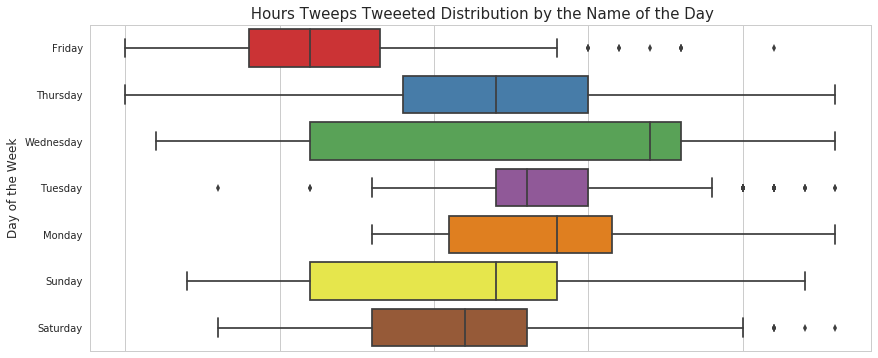

In [393]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='Hour', y='Name of the Day', data=dataset, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title(" Hours Tweeps Tweeeted Distribution by the Name of the Day", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Day of the Week", fontsize=12)

plt.show()

## Feature Engineering in Text

In [394]:
#Setting the stopwords
eng_stopwords = set(stopwords.words("english"))

In [395]:
#Word count in each comment:
dataset['count_word']=dataset["Tweet"].apply(lambda x: len(str(x).split()))
dataset['count_word_tags']=dataset["Tweet"].apply(lambda x: len(str(x).split()))

#Unique word count
dataset['count_unique_word']=dataset["Tweet"].apply(lambda x: len(set(str(x).split())))
dataset['count_unique_word_tags']=dataset["Tweet"].apply(lambda x: len(set(str(x).split())))

#Letter count
dataset['count_letters']=dataset["Tweet"].apply(lambda x: len(str(x)))
dataset['count_letters_tags']=dataset["Tweet"].apply(lambda x: len(str(x)))

#punctuation count
dataset["count_punctuations"] =dataset["Tweet"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
dataset["count_punctuations_tags"] =dataset["Tweet"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
dataset["count_words_upper"] = dataset["Tweet"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
dataset["count_words_upper_tags"] = dataset["Tweet"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
dataset["count_words_title"] = dataset["Tweet"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
dataset["count_words_title_tags"] = dataset["Tweet"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
dataset["count_stopwords"] = dataset["Tweet"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
dataset["count_stopwords_tags"] = dataset["Tweet"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
dataset["mean_word_len"] = dataset["Tweet"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
dataset["mean_word_len_tags"] = dataset["Tweet"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

### Quick Visualization of the Engineered Features

In [396]:
#derived features
#Word count percent in each comment:
dataset['word_unique_percent']=dataset['count_unique_word']*100/dataset['count_word']
dataset['word_unique_percent_tags']=dataset['count_unique_word_tags']*100/dataset['count_word_tags']

#Punct percent in each comment:
dataset['punct_percent']=dataset['count_punctuations']*100/dataset['count_word']
dataset['punct_percent_tags']=dataset['count_punctuations_tags']*100/dataset['count_word_tags']

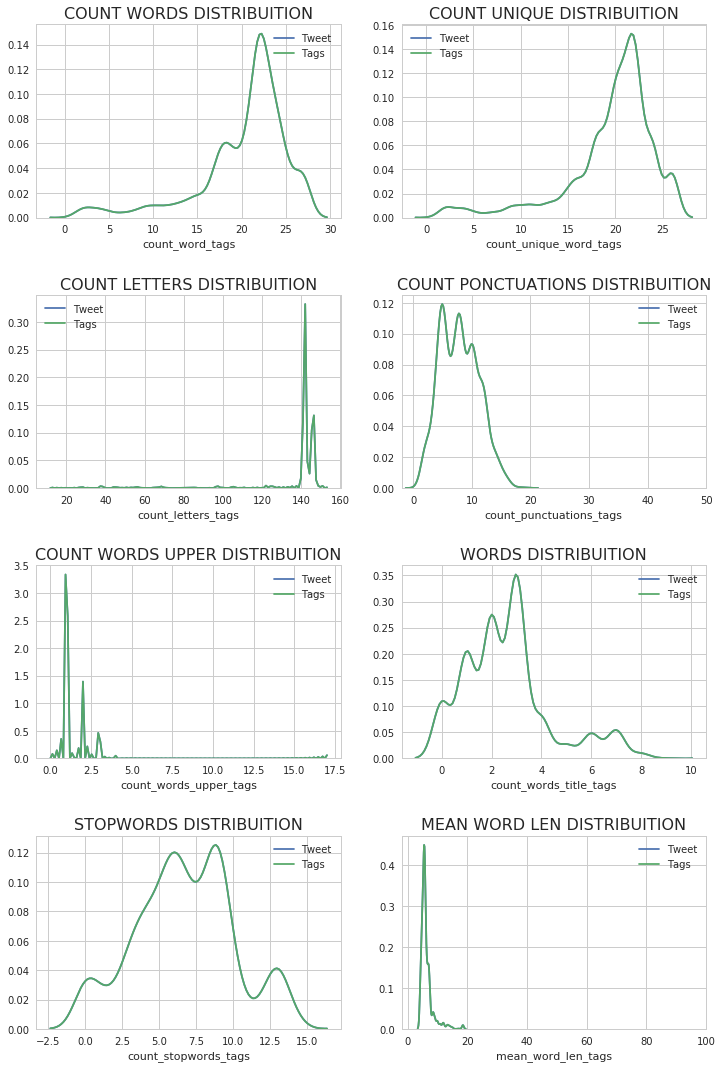

In [397]:
plt.figure(figsize = (12,18))

plt.subplot(421)
g1 = sns.distplot(dataset['count_word'], 
                  hist=False, label='Tweet')
g1 = sns.distplot(dataset['count_word_tags'], 
                  hist=False, label='Tags')
g1.set_title("COUNT WORDS DISTRIBUITION", fontsize=16)

plt.subplot(422)
g2 = sns.distplot(dataset['count_unique_word'],
                  hist=False, label='Tweet')
g2 = sns.distplot(dataset['count_unique_word_tags'], 
                  hist=False, label='Tags')
g2.set_title("COUNT UNIQUE DISTRIBUITION", fontsize=16)

plt.subplot(423)
g3 = sns.distplot(dataset['count_letters'], 
                  hist=False, label='Tweet')
g3 = sns.distplot(dataset['count_letters_tags'], 
                  hist=False, label='Tags')
g3.set_title("COUNT LETTERS DISTRIBUITION", fontsize=16)

plt.subplot(424)
g4 = sns.distplot(dataset["count_punctuations"], 
                  hist=False, label='Tweet')
g4 = sns.distplot(dataset["count_punctuations_tags"], 
                  hist=False, label='Tags')
g4.set_xlim([-2,50])
g4.set_title('COUNT PONCTUATIONS DISTRIBUITION', fontsize=16)

plt.subplot(425)
g5 = sns.distplot(dataset["count_words_upper"] , 
                  hist=False, label='Tweet')
g5 = sns.distplot(dataset["count_words_upper_tags"] , 
                  hist=False, label='Tags')
g5.set_title('COUNT WORDS UPPER DISTRIBUITION', fontsize=16)

plt.subplot(426)
g6 = sns.distplot(dataset["count_words_title"], 
                  hist=False, label='Tweet')
g6 = sns.distplot(dataset["count_words_title_tags"], 
                  hist=False, label='Tags')
g6.set_title('WORDS DISTRIBUITION', fontsize=16)

plt.subplot(427)
g7 = sns.distplot(dataset["count_stopwords"], 
                  hist=False, label='Tweet')
g7 = sns.distplot(dataset["count_stopwords_tags"], 
                  hist=False, label='Tags')
g7.set_title('STOPWORDS DISTRIBUITION', fontsize=16)

plt.subplot(428)
g8 = sns.distplot(dataset["mean_word_len"], 
                  hist=False, label='Tweet')
g8 = sns.distplot(dataset["mean_word_len_tags"], 
                  hist=False, label='Tags')
g8.set_xlim([-2,100])
g8.set_title('MEAN WORD LEN DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.legend()
plt.show()

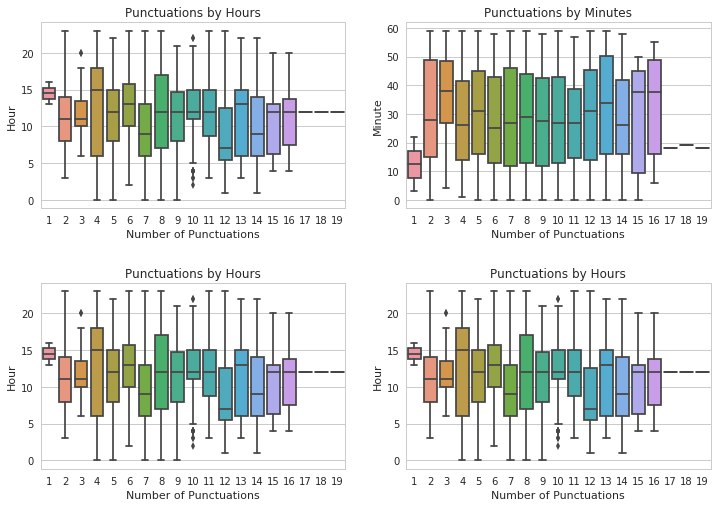

In [402]:
plt.figure(figsize = (12,8))

plt.subplot(221)
g=sns.boxplot(x='count_punctuations', y='Hour',data=dataset)
g.set_title("Punctuations by Hours")
g.set_xlabel("Number of Punctuations")
g.set_ylabel("Hour")

plt.subplot(222)
g1 = sns.boxplot(x='count_punctuations', y='Minute',data=dataset)
g1.set_title("Punctuations by Minutes")
g1.set_xlabel("Number of Punctuations")
g1.set_ylabel("Minute")

plt.subplot(223)
g2 = sns.boxplot(x='count_punctuations', y='Hour',data=dataset)
g2.set_title("Punctuations by Hours")
g2.set_xlabel("Number of Punctuations")
g2.set_ylabel("Hour")

plt.subplot(224)
g3 = sns.boxplot(x='count_punctuations', y='Hour',data=dataset)
g3.set_title("Punctuations by Hours")
g3.set_xlabel("Number of Punctuations")
g3.set_ylabel("Hour")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

##  Location Nairobi Tweets Hourly Distribution

Text(0.5,1,'Location Nairobi Tweets Hourly Distribution')

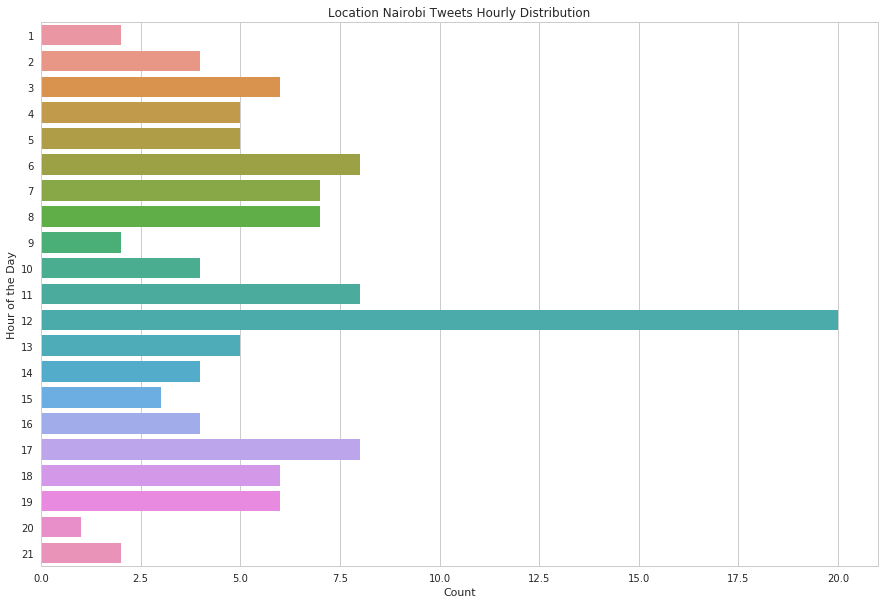

In [406]:
cat_df_us = dataset[dataset['Location']=='Nairobi']['Hour'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_us['index'],x=cat_df_us['Hour'], data=cat_df_us,orient='h')
plt.xlabel("Count")
plt.ylabel("Hour of the Day")
plt.title("Location Nairobi Tweets Hourly Distribution")

### Location Mombasa Tweets Hourly Distribution

Text(0.5,1,'Location Mombasa Tweets Hourly Distribution')

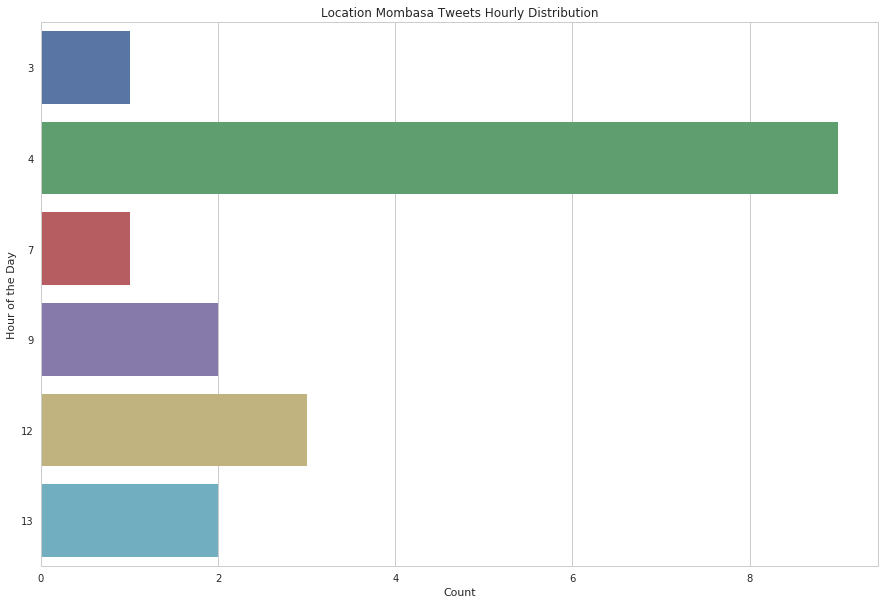

In [407]:
cat_df_us = dataset[dataset['Location']=='Mombasa']['Hour'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_us['index'],x=cat_df_us['Hour'], data=cat_df_us,orient='h')
plt.xlabel("Count")
plt.ylabel("Hour of the Day")
plt.title("Location Mombasa Tweets Hourly Distribution")

### Kenyan Based Tweets Source Device Types Hourly Distribution

Text(0.5,1,'Tweets Source Device Types Hourly Distribution in Kenya')

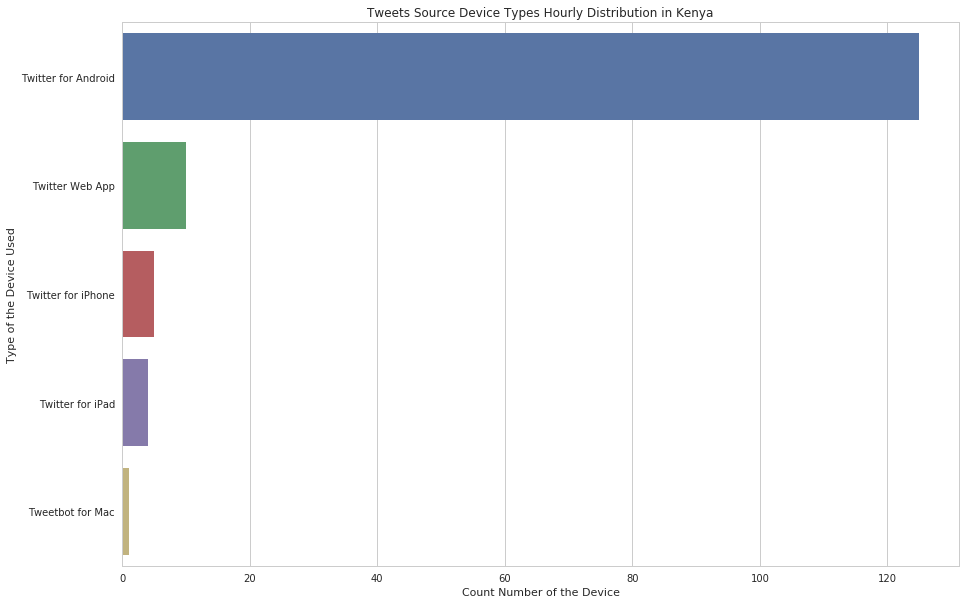

In [410]:
cat_df_ca = dataset[dataset['Location']=='Kenya']['Tweet Source'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_ca['index'],x=cat_df_ca['Tweet Source'], data=cat_df_ca,orient='h')
plt.xlabel("Count Number of the Device")
plt.ylabel("Type of the Device Used")
plt.title("Tweets Source Device Types Hourly Distribution in Kenya")

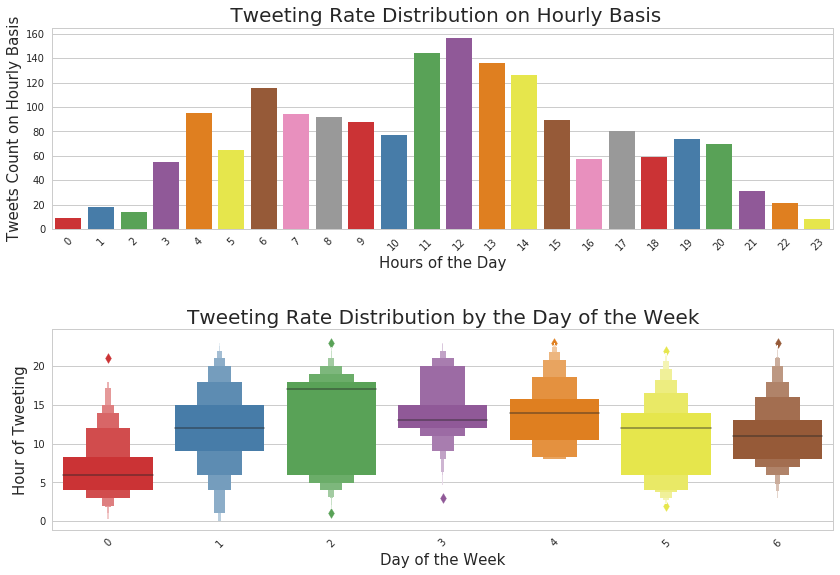

In [420]:
print("Category Name count")
print(dataset['Hour'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('Hour', data=dataset, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title(" Tweeting Rate Distribution on Hourly Basis", fontsize=20)
g.set_xlabel("Hours of the Day", fontsize=15)
g.set_ylabel("Tweets Count on Hourly Basis", fontsize=15)

plt.subplot(212)
g1 = sns.lvplot(x='Name of the Day', y='Hour', data=dataset, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Tweeting Rate Distribution by the Day of the Week", fontsize=20)
g1.set_xlabel("Day of the Week", fontsize=15)
g1.set_ylabel("Hour of Tweeting", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

In [ ]:
### 

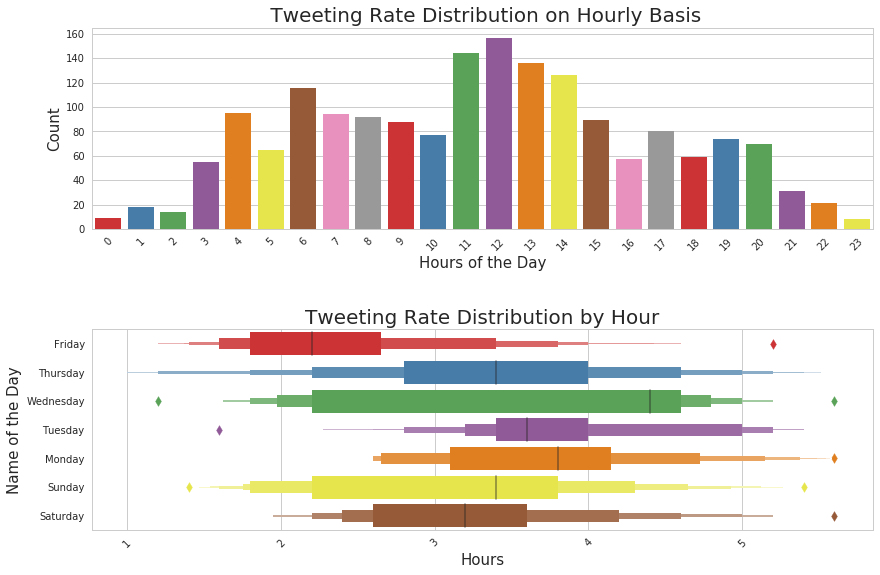

In [423]:
print("TOP 5 Hour values")
print(dataset['Hour'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('Hour', data=dataset, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title(" Tweeting Rate Distribution on Hourly Basis", fontsize=20)
g.set_xlabel("Hours of the Day", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.lvplot(x='Hour', y='Name of the Day', data=dataset, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Tweeting Rate Distribution by Hour", fontsize=20)
g1.set_xlabel("Hours", fontsize=15)
g1.set_ylabel("Name of the Day", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

## Grouping and Sorting Data Analysis

In [426]:
dataset.Language.unique()

array(['en', 'und', 'in', 'es', 'tl'], dtype=object)

In [427]:
dataset.Language.value_counts()

en     1704
und      58
in        7
es        5
tl        1
Name: Language, dtype: int64

In [432]:
dataset.groupby('Language').Location.count()

#.mean()
#.min()

Language
en     1704
es        5
in        7
tl        1
und      58
Name: Location, dtype: int64

In [434]:
dataset.groupby('Language').Location.min()

Language
en         #AmKenyan 
es     Des Moines, IA
in              Kenya
tl              Kenya
und        #AmKenyan 
Name: Location, dtype: object

In [439]:
dataset.groupby(['Language']).Hour.agg([len, min, max])

,len,min,max
Language,,,
en,1704,0,23
es,5,5,20
in,7,3,22
tl,1,7,7
und,58,2,21


In [444]:
dataset.groupby('Location').apply(lambda dataset: dataset.Language.iloc[0])

Location
#AmKenyan                         en
#ExpectUs!                        en
+254                              en
001                               en
01°17′11″S 36°49′02″E             en
127.0.0.1                         en
@Nairobi kenya                    en
A Place Near You.                 en
A good place                      en
A paradise in Africa              en
A place called Tharaka Nithi      en
Accra, Ghana                      en
Africa                            en
Africa                            en
Alcatraz Federal Penitentiary     en
Andromeda M31                     en
Anywhere                          en
Anywhere for Africa.              en
Aquarian Age, Africa              en
Arlington, TX / Nairobi - West    en
Athi River, Kenya                 en
Ba Sing Se                        en
Baltimore, MD                     en
Belgium/Kenya                     en
Best Location, Nairobi            en
Bogotá, DC, Colombia              en
Bondo Usenge, Siaya County   

#### Grouping by More than One Column

In [443]:
dataset.groupby(['Location', 'Language']).apply(lambda dataset: dataset.loc[dataset.Tweet_length.idxmax()])
dataset.sample(2)

,Datetime Created,Tweet,Language,Location,UserAccount Verified,Tweet Source,Retweet_count,Favourite_count,Sentiment,Year,...,count_words_title,count_words_title_tags,count_stopwords,count_stopwords_tags,mean_word_len,mean_word_len_tags,word_unique_percent,word_unique_percent_tags,punct_percent,punct_percent_tags
1083,2019-10-22 22:10:24,RT @JerotichSeii: WaKenya: I want to thank all...,en,Kenya,False,Twitter for Android,112,0,0.0,2019,...,3,3,13,13,4.296296,4.296296,96.296296,96.296296,18.518519,18.518519
605,2019-10-24 11:31:47,RT @JerotichSeii: Dear @TonyGachoka #KTNPointb...,en,Country Side,False,Twitter Web App,180,0,0.0,2019,...,2,2,9,9,5.681818,5.681818,100.000000,100.000000,45.454545,45.454545
